# 統計的推定
- 母平均に関する区間推定
- 母分散に関する点推定、区間推定
を行なう。

20人分の Data から学校全体である 400人分の平均点や分散をどれだけ推定できるのか確認する

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import stats
from IPython.display import display

% precision 3

UsageError: Line magic function `%` not found.


In [20]:
# Test data の準備
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['点数'])

In [21]:
# 正解となる母平均 μ と母分散 σ**2 いついて求めておく
p_mean = np.mean(scores)  # 母平均: μ
p_var = np.var(scores)  # 母分散：σ**2

p_mean, p_var

(69.530, 206.669)

区間推定を行なう際に母集団が正規分布に従っていることを仮定する。
仮定がどの程度妥当なのか、全生徒の点数の Histogram に N(μ, σ**2) を重ねて図示してみる

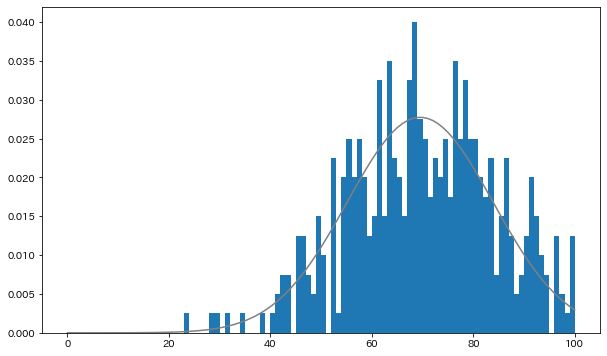

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0, 100), density=True)

plt.show()

きれいな分布ではないが、正規分布に近い特徴を持った分布となっている。

無作為抽出した20人分の標本 Data を準備する
※本来はこの Data しか知らない。

In [23]:
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
display(sample)

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

`sample`とは別に Sample size 20の標本Data を１万組用意する。
この Data を使って、平均や分散をどれだけの精度で推測できるかをシミュレーションしていく。

In [24]:
np.random.seed(1111)
n_sample = 10000
samples = np.random.choice(scores, (n_sample, n))

## 点推定
母平均や母分散といった母数を１つの数値で推定する。

### 母平均の点推定

In [25]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i + 1}回目の標本平均: {s_mean:.3f}')

1回目の標本平均: 67.000
2回目の標本平均: 72.850
3回目の標本平均: 69.200
4回目の標本平均: 64.450
5回目の標本平均: 72.650


#### 不偏性（unbiased ness)
推定量の期待値が推測したい母数になる性質のこと
#### 不偏推定量（unbiased estimator）
不偏性を持っている推定量のこと

標本平均の期待値が母平均 μ だることを大数の法則を使って確かめる

In [26]:
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.538

母平均 69.530 だったので標本平均の期待値は母平均になっていそう。標本平均が母平均をうまく推定できることの根拠の１つが、この不偏性。

#### 一致制（consistency）
Sample size: n を増やしていくと推測したい母数に収束していくという性質のこと。

#### 一致推定量（consistent estimator）
一致制を持った推定量のこと

標本平均は一致推定量でもある。
Sample size: n を100万にしたときの、標本平均をみてみる。

In [27]:
np.mean(np.random.choice(scores, int(1e6)))

69.543

母平均に近い値になった。
Sample size: n を増やしていくと標本平均は母平均に収束していく

推定量として、
- 不偏性
- 一致制

を持っていることが望ましい性質。

標本平均は、不偏性と一致制の両方を持っているため、母平均をうまく推定できるといえる。

In [28]:
# `sample`から改めて標本平均を計算する
s_mean = np.mean(sample)
s_mean

70.400

この標本平均をもとに母平均の区間推定を行なっていく。

### 母分散の点推定
標本分散が不偏性と一致制を持った推定量になるか確かめる。

In [29]:
# 標本分散は確率変数になっているので、試行のたびに結果が変わる。
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}回目の標本分散: {s_var:.3f}')

1回目の標本分散: 116.800
2回目の標本分散: 162.928
3回目の標本分散: 187.060
4回目の標本分散: 149.148
5回目の標本分散: 111.528


標本分散が母分散の不偏推定量となっているか大数の法則で確かめる。

In [30]:
# 用意しておいた１万組の標本 Data それぞれについて標本分散を求め、その平均を計算してみる。
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

196.344

母分散 σ**2 = 206.669 に比べて小さな値となった。標本分散は母分散の不偏推定量ではなさそうである。

#### 不偏分散（unbiased variance）
不偏分散は標本分散における割る数 n を n-1 にした式で計算される

#### 自由度（degree of freedom）
- 不偏分散の割る数 n-1 のこと。
- 自由に値をとることができる変数の数のこと。

大数の法則を使って不偏分散の期待値を確かめる

In [31]:
# NumPy では不偏分散を`var`関数の`ddof`引数に 1 を指定することで計算できる
# ddof は、Delta Degree Of Freedom（自由度の差）のこと

sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.678

母分散に近い値となった。不偏分散は母分散の不偏推定量になっていそうである。

In [32]:
# Sample size: n を100万にして確かめる
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.083

母分散に近い値となり、一致推定量になっていそうである。

不偏分散は不偏性と一致制を持っていることが確認できた。

In [33]:
# `sample`で、不偏分散を計算しておく
u_var = np.var(sample, ddof=1)
u_var

158.253

この不偏分散をもとに母分散の区間推定を行なっていく